# Assignment 2

Create a program to evaluate the Generalization Error (GE), Prediction Model Error (ME) and Training Error (TE) for the k-nearest neighbors (KNN) learning approach. For doing so, compute the model considering neighborhood sizes from 1 to 35.

### Imports:

In [1]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

### Built-in Custom Functions:

In [2]:
def KNN(N_size, x_train, Y_train, x_test):
    '''
    This function implements the KNN regression learning model. The required
    inputs are the following:
    -   N_size (integer): size of the neighborhood. Automatically reduced to
    training dataset size if greater than it.
    -   x_train (1-D list): list of x values related to the training data set.
    -   Y_train (1-D list): list of Y values related to the training data set.
    -   x_test (1-D list): list of x values related to the testing data set.

    The function outputs the following:
    -   Y_hat (1-D list): list containing the KNN regressed values for the 
    x_test data set according to the model training.
    '''

    N_size = np.minimum(len(x_train), N_size)

    x_i = [[x] for x in x_train]

    KNN = KNeighborsRegressor(N_size).fit(x_i, Y_train)

    x_i = [[x] for x in x_test]

    Y_hat = KNN.predict(x_i)

    return Y_hat


## Solution Code:

### Data Sets and Learning Model:


#### Training Set:

With $N^{training} = 50$:


- Generate $x_i$, $N^{training}$ uniformly separated data points between 0 and 1.

- Generate $n_i$, $N^{training}$ noise data points randomly distributed with 0 mean and 0.1 variance.

- Build the observed data model as: 

$Y_i^{training} = f(x_i) + n_i$, with $\space i = 1 ... N^{training}$ and $f(x) = sin(2 \pi · x)$

In [27]:
# Defining function to generate a set of data
def gen_data(n_samples: int) -> np.ndarray:
    def func_x(input):
        return np.sin((2)*(np.pi)*(input))

    #x_i = np.linspace(0, 1, num=n_samples)

    x_i = []
    delx = 1/n_samples

    for x in range(n_samples):
        x_i.append(x*delx)
    

    #noise 
    n_i = np.random.normal(loc=0, scale=np.sqrt(0.1), size=n_samples)

    #combining features + noise
    generated_samples = func_x(np.array(x_i)) + n_i


    #Dataset size
    print(f'Shape of generated labels: {np.shape(generated_samples)}\nShape of generated inputs: {np.shape(np.array(x_i))}')

    return np.array(x_i), generated_samples 

### Generating training set (`n_samples` = 50)

In [28]:
X_train, y_train = gen_data(n_samples=50)

Shape of generated labels: (50,)
Shape of generated inputs: (50,)


#### Testing Set:

With $N^{testing} = 300$:


- Follow the same previous steps, using $N^{testing}$ instead of $N^{training}$.

In [29]:
X_test, y_test = gen_data(n_samples=300)

Shape of generated labels: (300,)
Shape of generated inputs: (300,)


In [30]:
print(f'y_train: {y_train}')
print('--------------------')
print(f'y_test: {y_test}')

y_train: [-0.30635877 -0.14568481  0.60600494 -0.14880427  0.78739505  0.59119654
  0.77651342  0.98707844  0.55702193  0.68459147  0.63314195  1.45246657
  1.13020602  0.62907718  0.76966631  1.81147706  1.54877258  0.78799654
  0.44136125  0.51977817  0.82289418  1.06567462  0.75753847  0.28112919
  0.19939158 -0.32631844 -0.01133757 -0.09655896 -0.31942413 -0.11882912
 -0.56447886 -0.75006924 -0.34319194 -1.15782952 -0.44153565 -0.58890818
 -0.78740994 -0.86695126 -1.04002031 -1.43873824 -0.91844453 -1.75479539
 -0.83458067 -0.52084823 -0.94616782 -0.7599955  -0.8033289  -0.69543526
 -0.188146    0.54171004]
--------------------
y_test: [-0.17508906 -0.07108089 -0.06603087 -0.08682844  1.02615458  0.14674994
  0.53051697  0.38184872  0.07365746 -0.13226771 -0.36898381 -0.27353841
  0.63265709  0.16538286  0.83255268  0.16724051  0.47911836  0.68723749
  0.38086724  0.42371053  0.4759631   0.65313129  0.09214993  0.19502697
  0.28707586  0.55868444  0.54901735  1.0888745   0.67684113

#### Learning Model:

Use the K-Nearest Neighbors to evaluate its performance. Plot the model result for neighborhood sizes of 1, 5, 15, 25 and 40.

In [33]:
import matplotlib.pyplot as plt

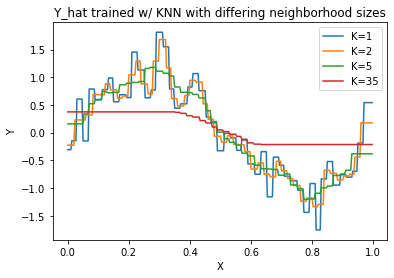

In [92]:
N_sizes_plot = [1,2,5,35] #Plot these neighborhood sizes

legend_names=['K=1', 'K=2', 'K=5', 'K=35', 'Y_train']
for n in N_sizes_plot:
    y_hat = KNN(N_size=n, x_train=X_train, Y_train=y_train, x_test=X_test)
    plt.plot(X_test, y_hat)
    plt.legend(legend_names)

#plt.plot(X_train, y_train)
plt.title('Y_hat trained w/ KNN with differing neighborhood sizes')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()


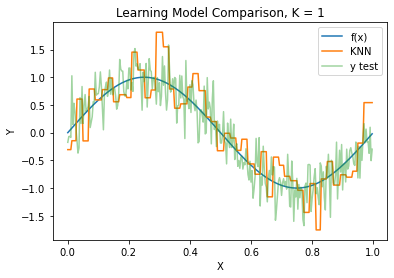

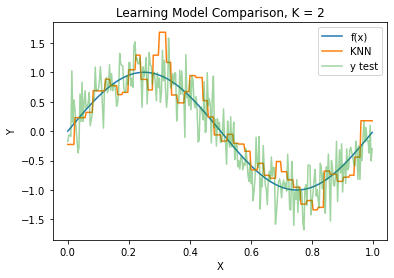

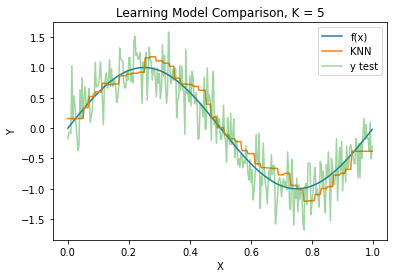

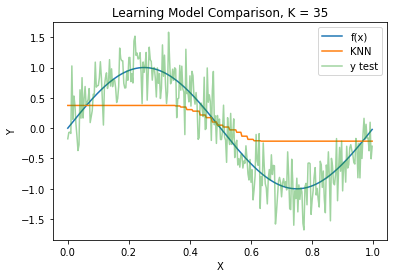

In [110]:
def plot_model_comparison(y_hat, k):
    plt.plot(X_test, np.sin(2*np.pi*X_test))
    plt.plot(X_test, y_hat)
    plt.plot(X_test, y_test, alpha=0.45)
    plt.title(f'Learning Model Comparison, K = {k}')
    plt.legend(['f(x)', 'KNN', 'y test'])
    plt.xlabel('X')
    plt.ylabel('Y')
    
for n in N_sizes_plot:
    y_hat = KNN(N_size=n, x_train=X_train, Y_train=y_train, x_test=X_test)
    plot_model_comparison(y_hat, k=n)
    plt.show()

Clearly, K = 5 fits it the best

### Evaluation:

#### Generalization Error (GE):

Generalization Error is from the testing set

In [106]:
y_hat = KNN(N_size=1, x_train=X_train, Y_train=y_train, x_test=X_test)

In [107]:
y_hat[10]

0.606004938783623

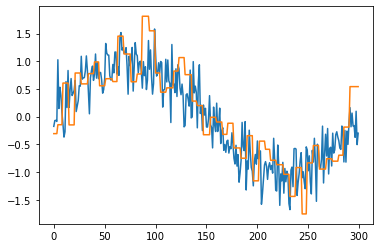

In [108]:
plt.plot(y_test)
plt.plot(y_hat)

In [102]:
y_test[10]

-0.36898381299501115

In [ ]:
for n in N_sizes_plot:
    y_hat = KNN(N_size=n, x_train=X_train, Y_train=y_train, x_test=X_test)
    

In [100]:
### GE Calculation:
N_test = 50
N_train = 300

for _ in range(1,N_test+1):
    np.sum(y_test[_] - y_hat)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


#### Model Prediction Error (ME):

In [ ]:
### ME Calculation:

#### Training Error (TE):

Training Error is from the training set

In [ ]:
### Regression of training dataset values:

#KNN result for training data input?

#TE Calculation:

#### Errors Plot:

In [ ]:
#Visualization of all errors alltogether? Different axis for two different trends?